In [1]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('Rainfall.csv', header=0)
print(series.head())
series.plot()
pyplot.show()

C:\Users\heanu\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Year
2017-01-01     53.3
2016-01-01    175.7
2015-01-01    142.0
2014-01-01    173.2
2013-01-01    141.4
Name: JAN-mm, dtype: float64


C:\Users\heanu\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
C:\Users\heanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """


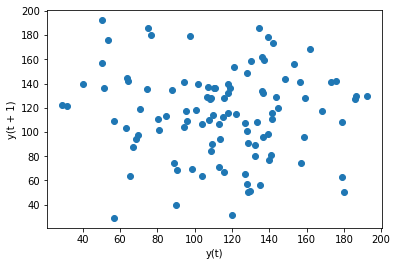

In [2]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
series = Series.from_csv('Rainfall.csv', header=0)
lag_plot(series)
pyplot.show()

In [3]:
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = Series.from_csv('Rainfall.csv', header=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000 -0.05217
t+1 -0.05217  1.00000


C:\Users\heanu\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


### Autocorrelation Plots

C:\Users\heanu\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)
C:\Users\heanu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


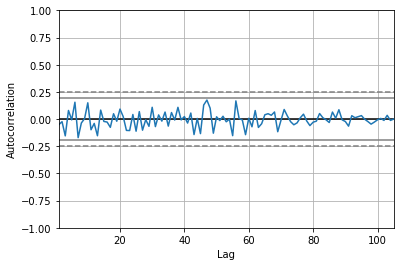

In [4]:
from pandas import Series
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
series = Series.from_csv('Rainfall.csv', header=0)
autocorrelation_plot(series)
pyplot.show()


C:\Users\heanu\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


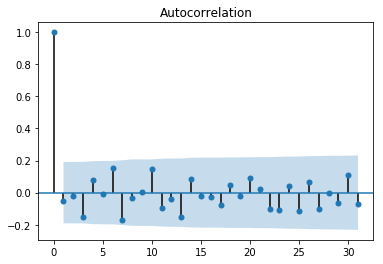

In [6]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = Series.from_csv('Rainfall.csv', header=0)
plot_acf(series, lags=31)
pyplot.show()

### Persistence Model

Test MSE: 1525.180


C:\Users\heanu\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


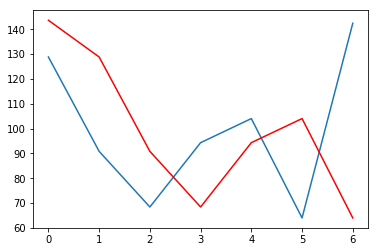

In [7]:
from pandas import Series
from pandas import DataFrame

from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = Series.from_csv('Rainfall.csv', header=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### Autoregression Model
An autoregression model is a linear regression model that uses lagged variables as input variables.

C:\Users\heanu\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Lag: 12
Coefficients: [  1.11914997e+02  -7.29101970e-02   3.85330809e-02  -9.36909256e-03
   6.46222645e-02   1.40339381e-02   1.21784723e-01  -1.71865983e-01
  -8.10203101e-02   3.97982462e-02   2.12321906e-01  -1.11816713e-01
  -2.29520769e-02]
predicted=90.460224, expected=128.800000
predicted=141.806502, expected=90.800000
predicted=112.517093, expected=68.400000
predicted=124.390110, expected=94.300000
predicted=104.614168, expected=104.000000
predicted=115.336969, expected=64.000000
predicted=104.318407, expected=142.400000
Test MSE: 1572.772


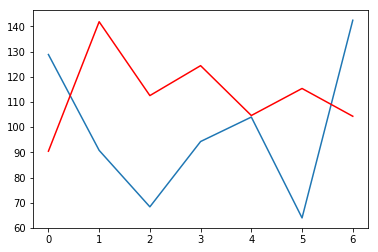

In [8]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('Rainfall.csv', header=0)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors or deviations—that is, the difference between the estimator and what is estimated.

predicted=90.460224, expected=128.800000
predicted=139.011141, expected=90.800000
predicted=117.713337, expected=68.400000
predicted=125.282050, expected=94.300000
predicted=108.063564, expected=104.000000
predicted=111.877523, expected=64.000000
predicted=109.422077, expected=142.400000
Test MSE: 1511.751


C:\Users\heanu\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


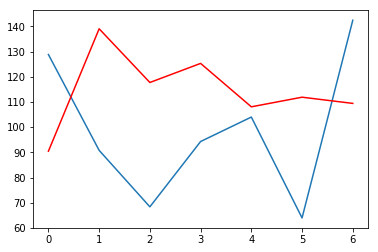

In [11]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('Rainfall.csv', header=0)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()